In [227]:
from pearce.mocks.kittens import cat_dict
import numpy as np
from scipy.stats import binned_statistic, linregress

In [228]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [229]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [364]:
cat2 = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!
cat2.load(0.658, HOD='abRedMagic')
print cat2.halocat.halo_table.keys()

0.658
['halo_upid', 'halo_y', 'halo_x', 'halo_z', 'halo_rvir', 'halo_snapnum', 'halo_halfmass_scale', 'halo_id', 'halo_vx', 'halo_vy', 'halo_vz', 'halo_rs', 'halo_mvir', 'halo_nfw_conc', 'halo_hostid', 'halo_mvir_host_halo']


In [230]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_snapnum',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo',
 'halo_rorb']

In [231]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

In [232]:
print float(sum(mass_cut))/len(mass_cut)

3.10153519216e-05


In [233]:
print cat.pmass

591421440.0


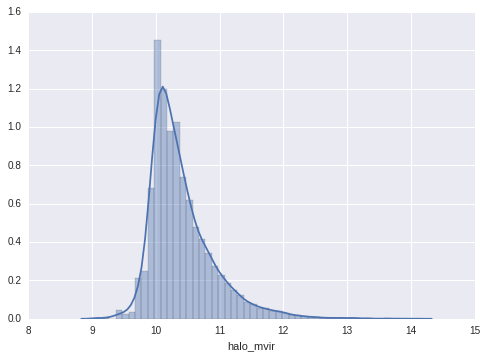

In [234]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

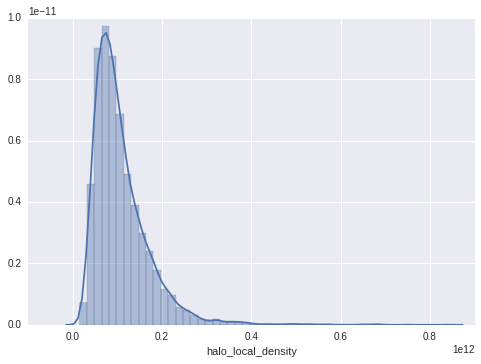

In [235]:
sns.distplot(cat.halocat.halo_table['halo_local_density'][rand_idxs], hist=True, kde=True)

In [236]:
print min(cat.halocat.halo_table['halo_local_density'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density'][rand_idxs])

15008653095.1
842828351704.0


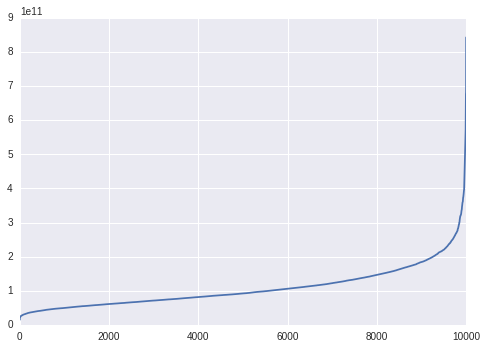

In [237]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]))

In [238]:
vol = 4*np.pi/3*(5**3)

In [239]:
print sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]*vol/(100*cat.pmass))[:50]

[132.87499999999997, 175.74999999999994, 181.625, 186.24999999999994, 190.62499999999994, 190.99999999999994, 193.24999999999997, 193.37499999999997, 195.74999999999997, 197.62499999999997, 198.62499999999997, 202.12499999999997, 209.37499999999997, 213.99999999999997, 215.99999999999997, 218.49999999999997, 219.62499999999997, 219.74999999999997, 220.24999999999997, 224.24999999999997, 226.24999999999997, 226.74999999999997, 227.49999999999994, 227.87499999999997, 228.24999999999997, 228.37499999999997, 229.37499999999997, 229.49999999999997, 230.12499999999997, 230.74999999999997, 231.99999999999997, 232.24999999999997, 232.87499999999997, 234.49999999999994, 236.37499999999997, 236.49999999999997, 237.74999999999997, 238.24999999999997, 238.87499999999997, 239.12499999999997, 239.24999999999997, 239.24999999999997, 239.49999999999997, 239.49999999999997, 239.87499999999997, 240.12499999999997, 241.24999999999997, 241.62499999999997, 241.74999999999997, 242.12499999999997]


In [240]:
rho_b = cat.halocat.halo_table['halo_local_density']

In [241]:
rho_halo = cat.halocat.halo_table['halo_mvir']/(4*np.pi/3*cat.halocat.halo_table['halo_rvir']**3)

In [242]:
relative_density = rho_halo/rho_b

(array([  3.31490000e+04,   1.16066000e+05,   2.45717000e+05,
          5.04248000e+05,   7.62870000e+05,   9.68599000e+05,
          1.07081100e+06,   1.18069200e+06,   1.22392300e+06,
          1.20737600e+06,   1.17324600e+06,   1.11185500e+06,
          1.04826700e+06,   9.74615000e+05,   8.86868000e+05,
          8.07336000e+05,   7.30454000e+05,   6.58536000e+05,
          5.90214000e+05,   5.24007000e+05,   4.58233000e+05,
          4.01977000e+05,   3.46687000e+05,   3.03010000e+05,
          2.62439000e+05,   2.26993000e+05,   1.97834000e+05,
          1.70263000e+05,   1.45772000e+05,   1.24525000e+05,
          1.06771000e+05,   9.16790000e+04,   7.82810000e+04,
          6.67240000e+04,   5.69630000e+04,   4.94570000e+04,
          4.25090000e+04,   3.61790000e+04,   3.05860000e+04,
          2.59030000e+04,   2.14630000e+04,   1.82500000e+04,
          1.55640000e+04,   1.28560000e+04,   1.12240000e+04,
          9.84100000e+03,   8.34300000e+03,   7.01800000e+03,
        

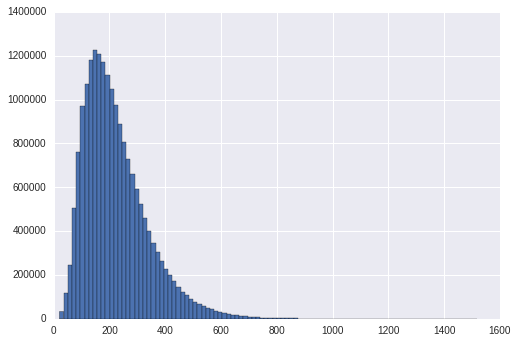

In [243]:
plt.hist(relative_density, bins=100)

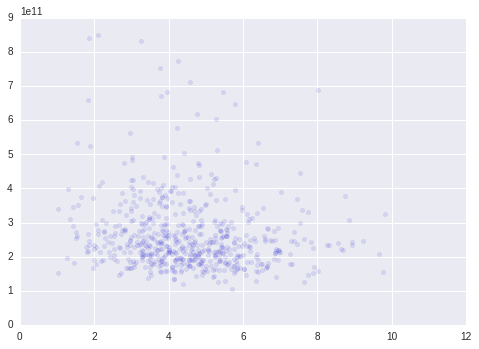

In [244]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], alpha=0.1)

In [294]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e5), replace = False)
mass_cut = np.logical_and(cat.halocat.halo_table['halo_mvir']> 1e13, cat.halocat.halo_table['halo_mvir']< 1e15)

In [367]:
dex = 0.2
mass_bin = 1e13
mass_cut1 =  cat.halocat.halo_table['halo_mvir']> mass_bin
mass_cut2 = cat.halocat.halo_table['halo_mvir'] < 10**(np.log10(mass_bin)+dex) 
mass_cut = np.logical_and(mass_cut1, mass_cut2)

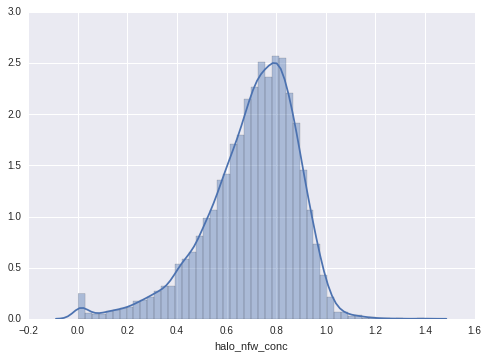

In [368]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]), hist=True, kde=True)

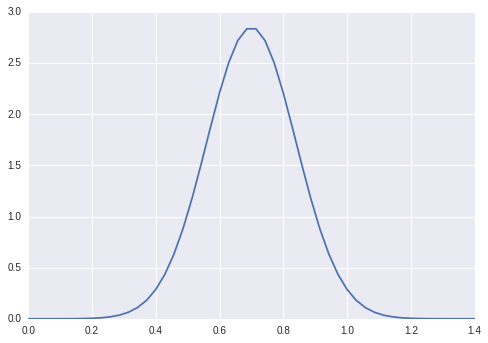

In [391]:
x = np.linspace(0, 1.4, 50)
plt.plot(x, norm.pdf(x, loc = 0.7 ,scale = .14))

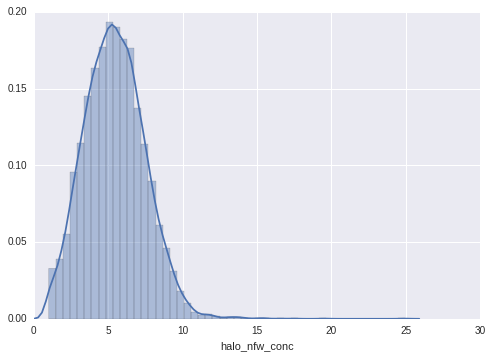

In [369]:
sns.distplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut], hist=True, kde=True)

In [380]:
np.mean(cat.halocat.halo_table['halo_nfw_conc'][mass_cut])

5.4401908

In [399]:
var = np.mean(np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]))**2*0.18**2
print np.sqrt(var)

0.126122145653


In [376]:
from scipy.stats import lognorm, norm

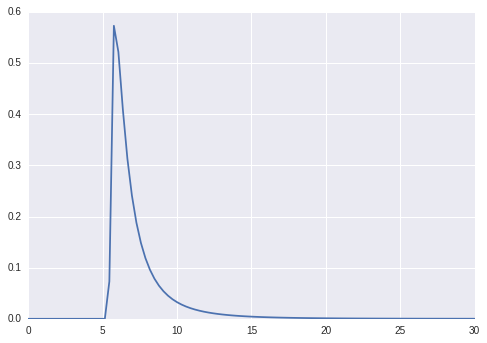

In [400]:
x = np.linspace(0, 30, 100)
plt.plot(x, lognorm.pdf(x,np.ones(x.shape), loc = 5.4 ,scale = np.exp(np.sqrt(var))))

In [352]:
n_particles = cat.halocat.halo_table['halo_local_density']*(4*np.pi/300*10**3)/(cat.pmass)
rho_bar = 2048**3/(400.0**3)*(4*np.pi/300*10**3)
cat.halocat.halo_table['halo_rorb']= n_particles/rho_bar

In [353]:
print np.mean(cat.halocat.halo_table['halo_nfw_conc'])
print np.mean(cat.halocat.halo_table['halo_nfw_conc'][mass_cut])

9.66096
4.5184


In [354]:
print np.max(cat.halocat.halo_table['halo_nfw_conc'])
print np.max(cat.halocat.halo_table['halo_nfw_conc'][mass_cut])

3733.12
9.76298


In [295]:
nbins = 10

In [296]:
binned_conc, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]), bins = nbins)

In [297]:
binned_conc_std, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]),\
                statistic= np.std, bins = nbins)

In [298]:
print bin_edges
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

[ 13.00043392  13.19423752  13.38804111  13.58184471  13.77564831
  13.9694519   14.1632555   14.3570591   14.55086269  14.74466629
  14.93846989]


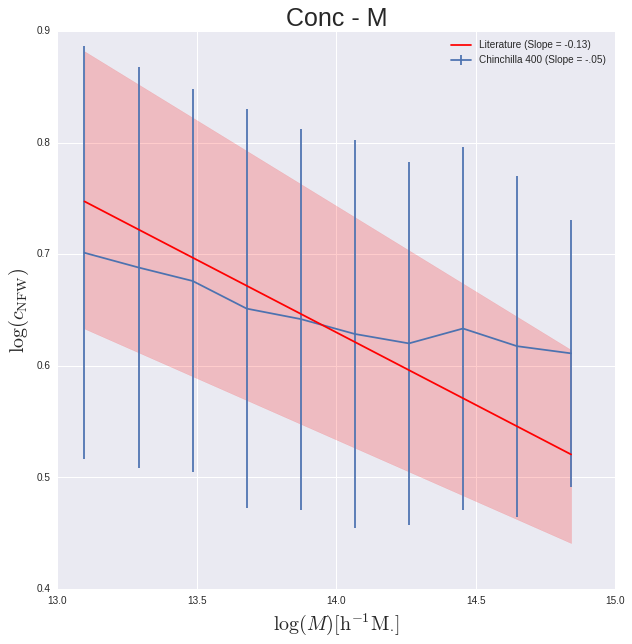

In [319]:
fig = plt.figure(figsize=(10,10))
plt.title('Conc - M', fontsize = 25)
plt.errorbar(bin_centers, binned_conc, binned_conc_std, label = 'Chinchilla 400 (Slope = -.05)')

plt.plot(bin_centers, -0.13*bin_centers+2.45, color = 'r', label = 'Literature (Slope = -0.13)')
plt.fill_between(bin_centers,1.18*(-0.13*bin_centers+2.45), (-0.13*bin_centers+2.45)/1.18, color = 'r', alpha = .2 )
#plt.loglog()
plt.xlabel(r'$\log(M) \mathrm{[h^{-1} M_{\cdot}]}$', fontsize = 20)
plt.ylabel(r'$\log(c_{\mathrm{NFW}})$', fontsize = 20)
plt.legend(loc='best')
plt.show()

In [300]:
slope, intercept, r, p, err = linregress(bin_centers, binned_conc)
print slope, intercept, r

-0.0507946036546 1.35653083681 -0.94678131371


In [355]:
binned_conc, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_rorb'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]), bins = nbins)

In [356]:
binned_conc_std, bin_edges, bno = binned_statistic(\
                np.log10(cat.halocat.halo_table['halo_rorb'][mass_cut]), np.log10(cat.halocat.halo_table['halo_nfw_conc'][mass_cut]),\
                statistic= np.std, bins = nbins)

In [357]:
print bin_edges
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

[ 0.11968522  0.21022888  0.30077254  0.3913162   0.48185986  0.57240352
  0.66294718  0.75349084  0.8440345   0.93457816  1.02512182]


In [358]:
slope, intercept, r, p, err = linregress(bin_centers, binned_conc)
print slope, intercept, r

-0.285834177886 0.761904830732 -0.969208271146


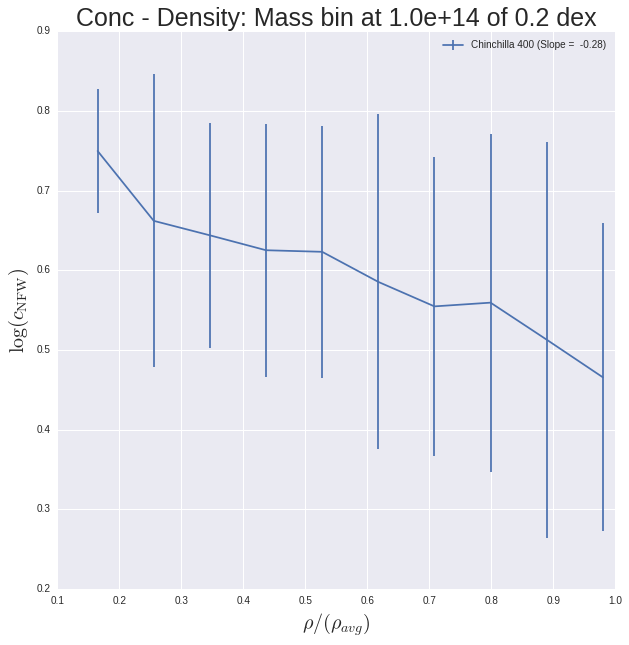

In [360]:
fig = plt.figure(figsize=(10,10))
plt.title('Conc - Density: Mass bin at %.1e of 0.2 dex'%mass_bin, fontsize = 25)
plt.errorbar(bin_centers, binned_conc, binned_conc_std, label = 'Chinchilla 400 (Slope =  -0.28)')

#plt.plot(bin_centers, -0.13*bin_centers+2.45, color = 'r', label = 'Literature (Slope = ?)')
#plt.fill_between(bin_centers,1.18*(-0.13*bin_centers+2.45), (-0.13*bin_centers+2.45)/1.18, color = 'r', alpha = .2 )
#plt.loglog()
plt.xlabel(r'$\rho/(\rho_{avg})$', fontsize = 20)
plt.ylabel(r'$\log(c_{\mathrm{NFW}})$', fontsize = 20)
plt.legend(loc='best')
plt.show()

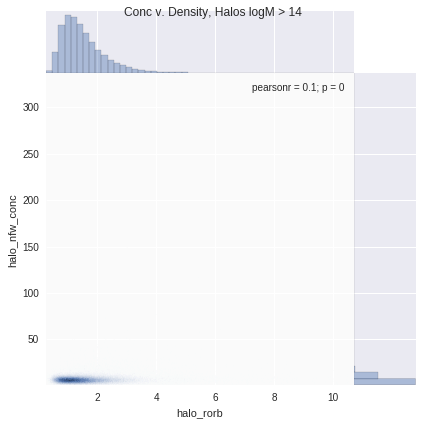

In [150]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 14')

In [151]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_snapnum',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo',
 'halo_rorb']

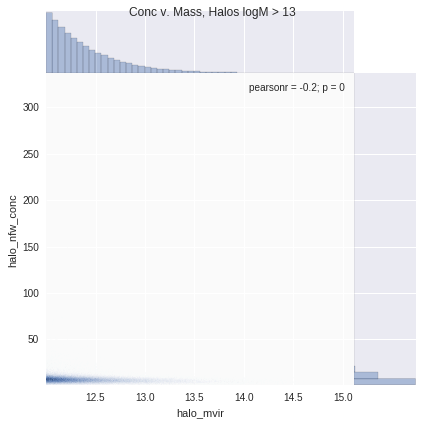

In [152]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]),\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Mass, Halos logM > 13')

In [153]:
idxs = np.logical_and(cat.halocat.halo_table['halo_rorb'][mass_cut] < 15, cat.halocat.halo_table['halo_mvir'][mass_cut]<10**14.25)

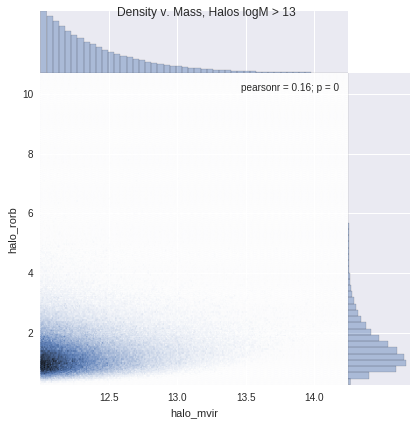

In [154]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut][idxs]),\
         cat.halocat.halo_table['halo_rorb'][mass_cut][idxs],kind = 'hex', space=0)
plt.suptitle('Density v. Mass, Halos logM > 13')

In [108]:
sns.jointplot(cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3),\
         cat.halocat.halo_table['halo_local_density'][mass_cut]/100, kind = 'hex', space=0)

KeyboardInterrupt: 

In [ ]:
ratio = (cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3))/cat.halocat.halo_table['halo_local_density'][mass_cut]

In [ ]:
ratio.mean(), ratio.std()

In [ ]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], kind = 'hex', space=0)

In [ ]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

In [ ]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [ ]:
cat.model.param_dict

In [ ]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [ ]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

In [ ]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 0.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0.0

In [ ]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [ ]:
cat.model.param_dict

In [ ]:
cat.calc_number_density()

In [ ]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [ ]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [ ]:
wp_vals.shape

In [ ]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

In [ ]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [ ]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

In [ ]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [ ]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [ ]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [ ]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()